In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
print("Reading")
#m2=399795-703091
col_names = ['ID','PARTNUMBER','SERIALNUMBER','PRODUCTIONRUN','MACHINENAME','CYCLENUMBER','CURRENTCYCLETIME','CYCLETIME','FILLTIME','SCREWRETPOSITION','TRANSITIONPOSITION','CUSHIONSIZE','REFILLTIME','NOZZLETEMP','BACKPRESS','INJSPEEDSEG1','INJSPEEDSEG2','INJSPEEDSEG3','PACKPRESSSEG1','HOLDPRESSSEG1','TRANSITIONPRESSURE','STOREDDATE','ACTIVE_MONITORINGID','PEAKPRESSURE','INJECTIONPRESSURE','ISBADPIECE','CYCLETIMEMIN','CYCLETIMEMAX','FILLTIMEMIN','FILLTIMEMAX','SCREWRETPOSITIONMIN','SCREWRETPOSITIONMAX','TRANSITIONPOSITIONMIN','TRANSITIONPOSITIONMAX','CUSHIONSIZEMIN','CUSHIONSIZEMAX','REFILLTIMEMIN','REFILLTIMEMAX','NOZZLETEMPMIN','NOZZLETEMPMAX','BACKPRESSMIN','BACKPRESSMAX','PEAKPRESSUREMIN','PEAKPRESSUREMAX','TRANSITIONPRESSUREMIN','TRANSITIONPRESSUREMAX','PACKPRESSSEG1MIN','PACKPRESSSEG1MAX','TOOLNUMBER']
data= pd.read_csv('sorted_data.csv',sep=',',nrows=403555,skiprows=1189957,names=col_names)
print("Reading done")
data.head()

Reading
Reading done


,ID,PARTNUMBER,SERIALNUMBER,PRODUCTIONRUN,MACHINENAME,CYCLENUMBER,CURRENTCYCLETIME,CYCLETIME,FILLTIME,SCREWRETPOSITION,...,NOZZLETEMPMAX,BACKPRESSMIN,BACKPRESSMAX,PEAKPRESSUREMIN,PEAKPRESSUREMAX,TRANSITIONPRESSUREMIN,TRANSITIONPRESSUREMAX,PACKPRESSSEG1MIN,PACKPRESSSEG1MAX,TOOLNUMBER
0,178682229,13673591.0,9894380484,860202,4,1888,NaN,19.4,1.03,1.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
1,166845693,13593466.0,9894203735,836719,4,996,NaN,17.2,0.98,0.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13593466 PM A 0002
2,178733037,13673591.0,9894380487,860202,4,2633,NaN,19.6,1.02,1.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
3,151001365,13673591.0,9893981618,814925,4,6640,NaN,20.7,1.00,1.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001
4,176639067,13673591.0,9894331286,857379,4,12325,NaN,20.0,1.00,1.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13673591 PM A 0001


In [21]:
import seaborn as sns

feature_cols=['CYCLETIME',  'SCREWRETPOSITION', 'CUSHIONSIZE', 'REFILLTIME','NOZZLETEMP', 'TRANSITIONPRESSURE','PEAKPRESSURE']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
X = data[feature_cols] # Features
print("Feature set complete\n")
y = data.ISBADPIECE # Target variable
print("Target variable set complete\n")


Feature set complete

Target variable set complete



In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [23]:
logreg = LogisticRegression()
logreg.fit(X,y)
ypred=logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, ypred)
#feature_cols=['CYCLETIME',  'SCREWRETPOSITION', 'CUSHIONSIZE', 'REFILLTIME','NOZZLETEMP', 'TRANSITIONPRESSURE','PEAKPRESSURE']
print(cnf_matrix)

[[80030     4]
 [  653    24]]


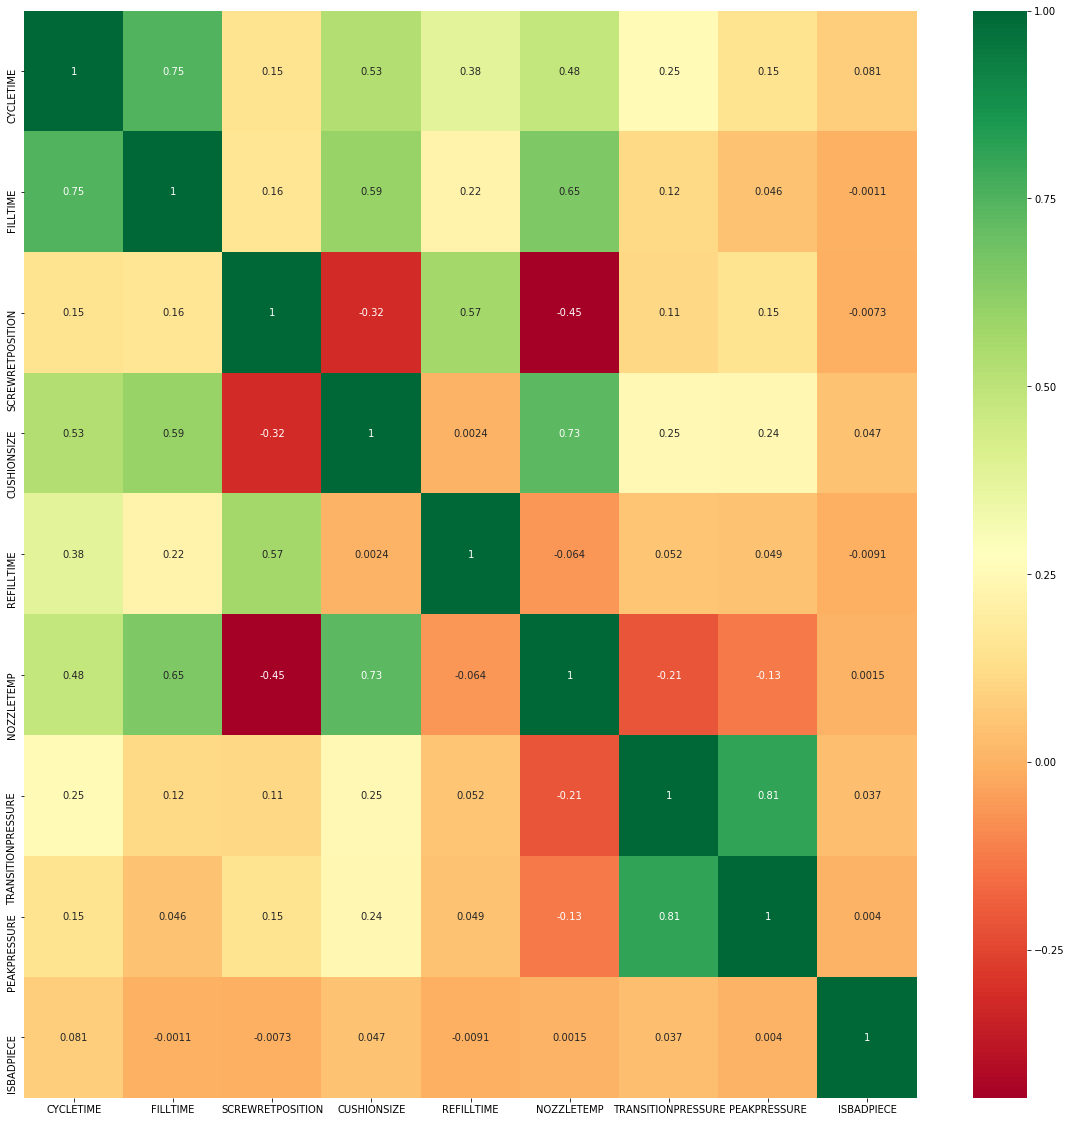

In [25]:
cols=['CYCLETIME','FILLTIME','SCREWRETPOSITION', 'CUSHIONSIZE', 'REFILLTIME','NOZZLETEMP', 'TRANSITIONPRESSURE','PEAKPRESSURE','ISBADPIECE']
data2=data[cols]
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

fitting


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.22522427 0.08657422 0.17391962 0.11327615 0.07812992 0.18989086
 0.13298495]


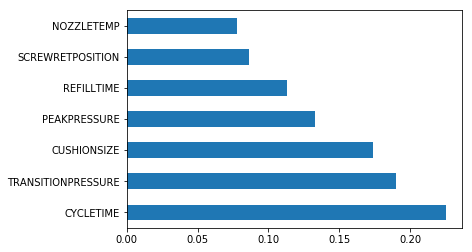

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
print("fitting")
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()